In [116]:
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from IPython.display import display
from IPython.display import Image
import itertools
%matplotlib inline
from skimage import data,filters
from datetime import datetime
from scipy import stats
import scipy.ndimage as ndimage
import numpy as np
from PIL import Image
from math import floor, ceil
import cv2
import os
import math
import random
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
import subprocess
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

def file_len(fname):
    p = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        raise IOError(err)
    return int(result.strip().split()[0])

image_dir = "../../CVassignment5_files"
p = 112
q = 92
rand_int = random.randint(0,40)

# Question 1
## 1a

In [2]:
training_path = f"{image_dir}/problem1_files/faces_training"
test_path = f"{image_dir}/problem1_files/faces_test"
training_images = [plt.imread(f"{training_path}/{x}") for x in os.listdir(training_path)]
test_images_1 = [plt.imread(f"{test_path}/test1/{x}") for x in os.listdir(f"{test_path}/test1/")]
test_images_2 = [plt.imread(f"{test_path}/test2/{x}") for x in os.listdir(f"{test_path}/test2/")]
test_images = test_images_1 + test_images_2

alpha = 16

def lower_rank_SVD(image, al):
    U, S, V = np.linalg.svd(image, full_matrices=False)
    S[al:] = 0
    S = np.diag(S)
    return U, S, V

def get_a(training_images):
    a_ = np.zeros(training_images[0].shape[0] * training_images[0].shape[1])
    for image in training_images:
        U, S, V = lower_rank_SVD(image, alpha)
        a_ = a_ + image.flatten()
    a_ = a_/len(training_images)
    return a_

def get_X(training_images, a_):
    X = np.array(np.zeros(len(a_)))
    X = np.transpose([X])
    for image in training_images:
        fi = image.flatten()
        x = fi - a_
        x = np.transpose([x])
        X = np.hstack((X, x))
    X = np.delete(X, 0, 1)
    return X/np.sqrt(len(training_images))

def get_SVD(X, alpha):
    U, S, V = np.linalg.svd(X)
    return U, S, V

def display_eigenfaces(U, alpha):
    for i in range(0, alpha):
        eig = np.transpose([U[:,i]])
        eig = eig - np.min(eig)
        eig = eig/np.max(eig)
        eig = (255*eig).astype(np.uint8)
        eig = eig.reshape(p, q)
        plt.imshow(eig, cmap='gray')
        plt.show()


In [3]:
a_ = get_a(training_images)
X = get_X(training_images, a_)
U, S, V = get_SVD(X, alpha)
U_alpha = U[:,:alpha]

Singular values:


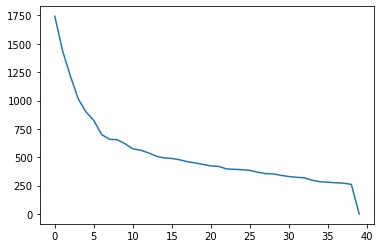

In [4]:
print("Singular values:")
plt.plot(S)
plt.show()


Average Vector:


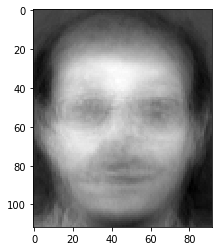

In [5]:
print("Average Vector:")
plt.imshow(a_.reshape(p, q).astype(np.uint8), cmap='gray')
plt.show()

Eigenfaces:


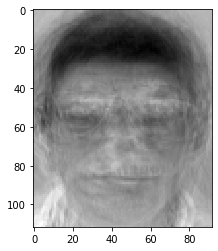

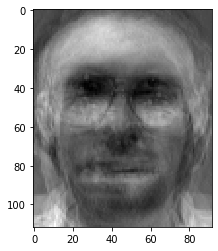

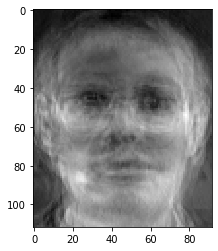

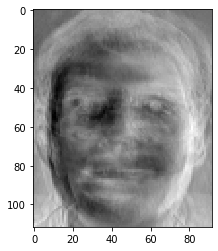

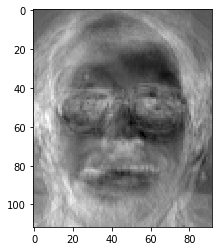

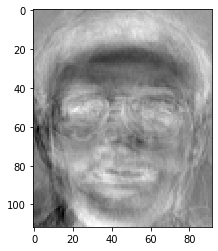

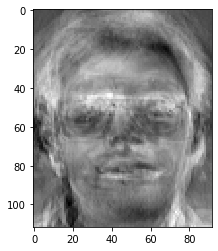

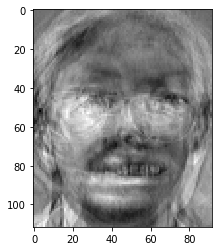

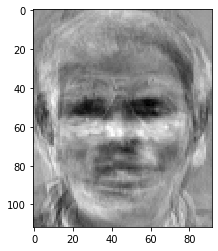

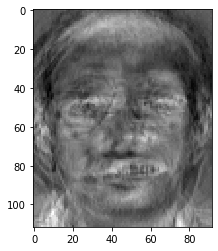

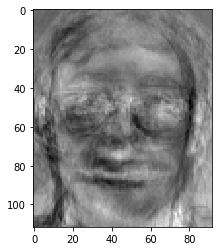

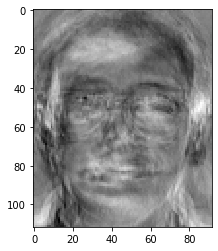

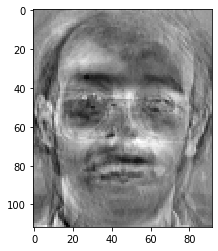

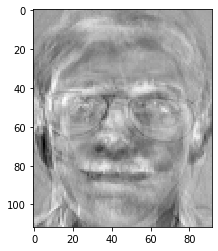

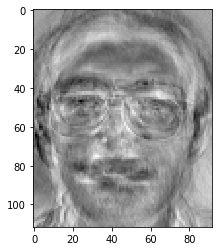

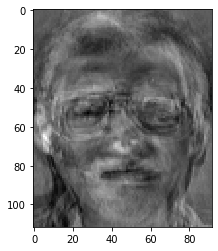

In [6]:
print("Eigenfaces:")
display_eigenfaces(U_alpha, alpha)

## 1b

In [7]:
def get_eigenfaces(image_set, U_alpha, a_):
    eigenfaces = []
    reconstructed = []
    for image in image_set:
        f = image.flatten()
        y = np.matmul(U_alpha.T, np.transpose([(f - a_)]))
        f_ = np.matmul(U_alpha, y) + np.transpose([a_])
        f_ = f_.reshape(p,q)
        f_ = f_.astype(np.uint8)
        eigenfaces.append(y)
        reconstructed.append(f_)
    return eigenfaces, reconstructed
test_eigenfaces, test_reconstructed = get_eigenfaces(test_images, U_alpha, a_)
training_eigenfaces, training_reconstructed = get_eigenfaces(training_images, U_alpha, a_)

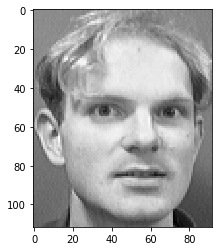

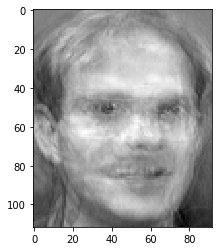

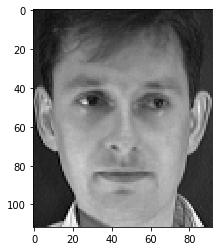

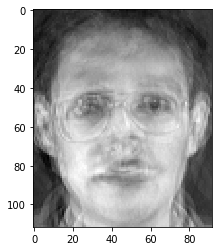

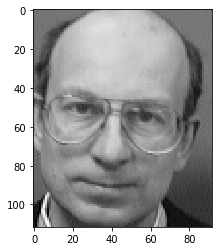

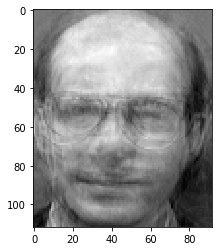

In [8]:
def display_reconstructed(test_images, test_reconstructed):
    for i in range(0, 3):
        plt.imshow(test_images[i], cmap='gray')
        plt.show()
        plt.imshow(test_reconstructed[i], cmap='gray')
        plt.show()
display_reconstructed(test_images, test_reconstructed)

## 1c

In [9]:
thresh= 2000
match_indices = []
for i in range(0, len(test_eigenfaces)):
    # Iterate through eigenfaces
    y1 = test_eigenfaces[i]
    best_dist = float("inf")
    best_match_index = -1
    for j in range(0, len(training_eigenfaces)):
        # Iterate through database of feature vectors
        y2 = training_eigenfaces[j]
        dist = np.linalg.norm(y1 - y2)
        if dist < best_dist:
            best_dist = dist
            best_match_index = j
    match_indices.append(best_match_index)

def get_accuracy(match_indices):
    right = 0
    wrong = 0
    for i in range(0,len(match_indices)):
        if match_indices[i] == i or match_indices[i] == i - 40:
            right += 1
        else:
            wrong += 1
    return 100*(right/len(match_indices))
print(alpha, get_accuracy(match_indices))

16 80.0


$\alpha$ = 5, Accuracy = 66.25% <br/>
$\alpha$ = 6, Accuracy = 70% <br/>
$\alpha$ = 7, Accuracy = 72.5% <br/>
$\alpha$ = 8, Accuracy = 76.25% <br/>
$\alpha$ = 9, Accuracy = 75% <br/>
$\alpha$ = 10, Accuracy = 76.25% <br/>
$\alpha$ = 11, Accuracy = 76.25% <br/>
$\alpha$ = 12, Accuracy = 78.75% <br/>
$\alpha$ = 13, Accuracy = 77.5% <br/>
$\alpha$ = 14, Accuracy = 76.25% <br/>
$\alpha$ = 15, Accuracy = 77.5% <br/>
$\alpha$ = 16, Accuracy = 80% <br/>
$\alpha$ = 17, Accuracy = 77.5% <br/>
$\alpha$ = 18, Accuracy = 78.75% <br/>
$\alpha$ = 19, Accuracy = 78.75% <br/>
$\alpha$ = 20, Accuracy = 78.75% <br/>
$\alpha$ = 21, Accuracy = 78.75% <br/>

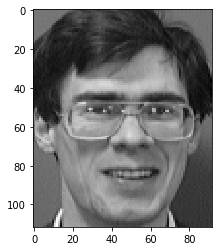

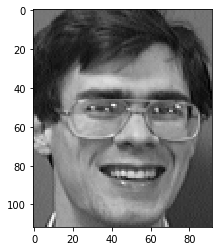

*****************************************


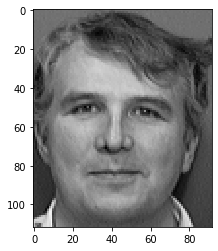

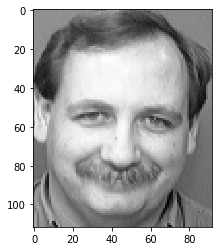

*****************************************


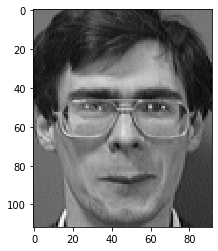

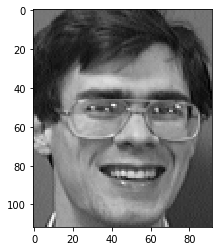

*****************************************


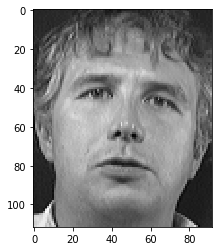

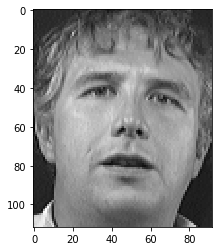

*****************************************


In [10]:
for i in range(3, len(match_indices), 20):
    plt.imshow(test_images[i], cmap='gray')
    plt.show()
    plt.imshow(training_images[match_indices[i]], cmap='gray')
    plt.show()
    print("*****************************************")

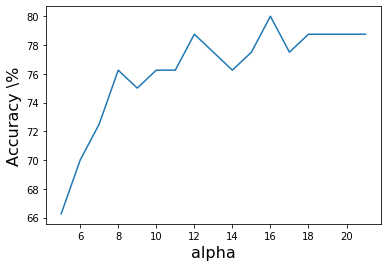

In [11]:
alphas = [x for x in range(5,22)]
accuracies = [66.25, 70, 72.5, 76.25,75,76.25,76.25, 78.75,77.5, 76.25,77.5,80, 77.5,78.75,78.75,78.75,78.75]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel(r'alpha', fontsize=16)
ax.set_ylabel(r'Accuracy \%', fontsize=16)
plt.plot(alphas, accuracies)
plt.show()

# Question 2
## 2a

In [125]:
images_path = f"{image_dir}/problem2_files/images"
sift_path = f"{image_dir}/problem2_files/sift"
def get_training_data():
    counts = []
    descriptors = [] 
    for cat in os.listdir(sift_path):
        cat_path = f"{sift_path}/{cat}/train"
        file_names = os.listdir(cat_path)
        file_names.sort()
        print(f"Loading: {cat}")
        for file_name in file_names:
            if "desc" in file_name:
                desc_file =  f"{cat_path}/{file_name}"
                desc_count = file_len(desc_file)
                counts.append(desc_count)
                descriptors = descriptors + \
                            pd.read_csv(desc_file, delim_whitespace=True, header=None).values.tolist()
            else:
                continue
    return counts, descriptors

def get_test_data():
    counts = []
    descriptors = [] 
    for cat in os.listdir(sift_path):
        cat_path = f"{sift_path}/{cat}/test"
        file_names = os.listdir(cat_path)
        file_names.sort()
        print(f"Loading: {cat}")
        for file_name in file_names:
            if "desc" in file_name:
                desc_file =  f"{cat_path}/{file_name}"
                desc_count = file_len(desc_file)
                counts.append(desc_count)
                descriptors = descriptors + \
                            pd.read_csv(desc_file, delim_whitespace=True, header=None).values.tolist()
            else:
                continue
    return counts, descriptors

def get_test_image(index):
    count = 0
    for cat in os.listdir(sift_path):
        cat_path = f"{images_path}/{cat}/test"
        file_names = os.listdir(cat_path)
        file_names.sort()
        for file_name in file_names:
            if count == index:
                print(cat)
                return f"{cat_path}/{file_name}"
            count+=1
    return false

def save_test_data(counts, descriptors):
    np.savetxt("test_descriptors.csv", descriptors, delimiter=",")
    np.savetxt("test_counts.csv", counts, delimiter=",")

In [36]:
def get_kmeans_50(descriptors):
    start = datetime.now()
    print(start)
    kmeans = KMeans(n_clusters=50).fit(descriptors)
    end = datetime.now()
    print(end)
    print(f"kmeans took {end - start}")
    return kmeans

def save_kmeans(kmeans, counts):
    np.savetxt("labels.csv", kmeans.labels_, delimiter=",")
    np.savetxt("centres.csv", kmeans.cluster_centers_, delimiter=",")
    np.savetxt("counts.csv", counts, delimiter=",")


In [37]:
def get_sift_filenames(counts):
    for cat in os.listdir(sift_path):
        cat_path = f"{sift_path}/{cat}/train"
        file_names = os.listdir(cat_path)
        file_names.sort()
        for file_name in file_names:
            if "desc" in file_name:
                desc_file =  f"{cat_path}/{file_name}"
                print(f"{cat} : {file_name}")
            else:
                continue

In [88]:
def get_image_vectors(counts, labels):
    i = -1
    image_vectors = []
    # For each image
    for count in counts:
        # For each desc in the image
        image = np.zeros(50)
        for desc in range(int(count)):
            i += 1
            image[int(labels[i])] += 1
        image = np.asarray(image)
        image = image/sum(image)
        image_vectors.append(image.tolist())
    return image_vectors

def get_image_descriptors(cts, descriptors):
    output = []
    prev_count = 0
    print(len(cts))
    for count in cts:
        current = count+prev_count
        desc = descriptors[prev_count:current]
        output.append(desc)
        prev_count = current
    return output

def get_correct_lables(test_image_count):
    correct_labels=[]
    index = 0
    for i in range(9):
        correct_labels += test_image_count[i]*[i]
    return correct_labels

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(cm.tolist())
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    fig.set_size_inches(15,15)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Correct label')
    plt.xlabel('Predicted label')
    


In [54]:
def draw_image_histogram(image_vector):
    data = [(i, image_vector[i]) for i in range(0, 50)]
    fig, ax = plt.subplots()
    fig.set_size_inches(15,10)
    N = len(data)
    x = np.arange(1, N+1)
    y = [num for (s, num) in data]
    labs = [s for (s, num) in data]
    width = 0.7
    plt.bar(x, y, width, color="g")
    plt.ylabel("% of Features per Cluster")
    plt.xlabel("Cluster number")
    plt.xticks(x, labs)
    ax.set(ylim=[0, .2])
    plt.show()

In [8]:
# train_labels = pd.read_csv("labels.csv",header=None).values.flatten().tolist()
# train_centres = pd.read_csv("centres.csv",header=None).values.flatten().tolist()
# train_counts = pd.read_csv("counts.csv",header=None).values.flatten().tolist()

In [9]:
test_counts, test_descriptors = get_test_data()

Loading: Coast
Loading: Street
Loading: Forest
Loading: Highway
Loading: Mountain
Loading: Kitchen
Loading: Store
Loading: Office
Loading: Suburb


In [10]:
train_counts, train_descriptors = get_training_data()

Loading: Coast
Loading: Street
Loading: Forest
Loading: Highway
Loading: Mountain
Loading: Kitchen
Loading: Store
Loading: Office
Loading: Suburb


In [11]:
kmeans = get_kmeans_50(train_descriptors)

2019-10-22 18:27:16.427015
2019-10-22 18:34:29.342901
kmeans took 0:07:12.915886


In [12]:
test_predicted = kmeans.predict(test_descriptors)
train_predicted = kmeans.predict(train_descriptors)

In [13]:
train_image_vectors = get_image_vectors(train_counts, train_predicted)
test_image_vectors = get_image_vectors(test_counts, test_predicted)

In [14]:
# Split the vectors per image
train_lables_per_image = get_image_descriptors(train_counts, train_predicted)

900


In [15]:
test_lables_per_image = get_image_descriptors(test_counts, test_predicted)

1695


In [16]:

test_image_count = [len(os.listdir(f"{images_path}/{cat}/test")) for cat in os.listdir(sift_path)]
train_image_count = [len(os.listdir(f"{images_path}/{cat}/train")) for cat in os.listdir(sift_path)]

In [160]:
def get_svm_predictions(test_image_count,
                        train_image_count,
                        test_image_vectors,
                        train_image_vectors):
    y = [0]*100
    y.extend([1]*100)
    y = np.array(y)
    count=0
    total=0
    svm_count = int((9*(9-1))/2)
    predictions_table = np.zeros((len(test_image_vectors), svm_count)) - 1
    # SVM for each seperate pair of classes
    for i in range(9):
        for j in range(i+1,9):
            predictions = []
            svclassifier = LinearSVC()
#             svclassifier = LinearSVC(C=10)
            X = np.append(train_image_vectors[i*(train_image_count[i]):(i+1)*(train_image_count[i])], \
                          train_image_vectors[j*(train_image_count[i]):(j+1)*(train_image_count[i])]).reshape(-1,50)        
            # Fit the SVM model according to the given training data.
            svclassifier.fit(X,y)
            predict = svclassifier.predict(test_image_vectors)
            for ind in predict:
                if ind == 0:
                    predictions.append(i)
                else:
                    predictions.append(j)
            predictions_table[:, count] = predictions        
            count += 1
    return predictions_table

prediction_table = get_svm_predictions(test_image_count,train_image_count,test_image_vectors,train_image_vectors)

In [161]:
predicted_lables = stats.mode(prediction_table, axis=1)[0]
correct_lables = get_correct_lables(test_image_count)
accuracy = accuracy_score(correct_lables, predicted_lables)
class_accuracy = recall_score(correct_lables, predicted_lables, average=None)
cm = confusion_matrix(correct_lables,predicted_lables)
report = classification_report(correct_lables,predicted_lables)

In [164]:
print("classification report:\n",report)

classification report:
               precision    recall  f1-score   support

           0       0.68      0.49      0.57       260
           1       0.45      0.57      0.50       192
           2       0.77      0.92      0.84       228
           3       0.52      0.43      0.47       160
           4       0.73      0.49      0.59       274
           5       0.53      0.45      0.48       110
           6       0.57      0.66      0.61       215
           7       0.61      0.65      0.63       115
           8       0.57      0.85      0.69       141

    accuracy                           0.61      1695
   macro avg       0.60      0.61      0.60      1695
weighted avg       0.62      0.61      0.61      1695



[[128  35  15  41  22   1   3   2  13]
 [  2 110   4   3   9   6  46   3   9]
 [  0   4 210   0   6   0   7   0   1]
 [ 32  25   0  69   7   3   8   5  11]
 [ 26  27  28  12 134   3  23   0  21]
 [  0  12   0   1   0  49   7  28  13]
 [  0  27  13   2   5   9 141   7  11]
 [  0   6   0   1   0  19   4  75  10]
 [  0   0   1   3   1   3  10   3 120]]
[[0.49230769230769234, 0.1346153846153846, 0.057692307692307696, 0.1576923076923077, 0.08461538461538462, 0.0038461538461538464, 0.011538461538461539, 0.007692307692307693, 0.05], [0.010416666666666666, 0.5729166666666666, 0.020833333333333332, 0.015625, 0.046875, 0.03125, 0.23958333333333334, 0.015625, 0.046875], [0.0, 0.017543859649122806, 0.9210526315789473, 0.0, 0.02631578947368421, 0.0, 0.03070175438596491, 0.0, 0.0043859649122807015], [0.2, 0.15625, 0.0, 0.43125, 0.04375, 0.01875, 0.05, 0.03125, 0.06875], [0.0948905109489051, 0.09854014598540146, 0.10218978102189781, 0.043795620437956206, 0.48905109489051096, 0.010948905109489052, 0.0

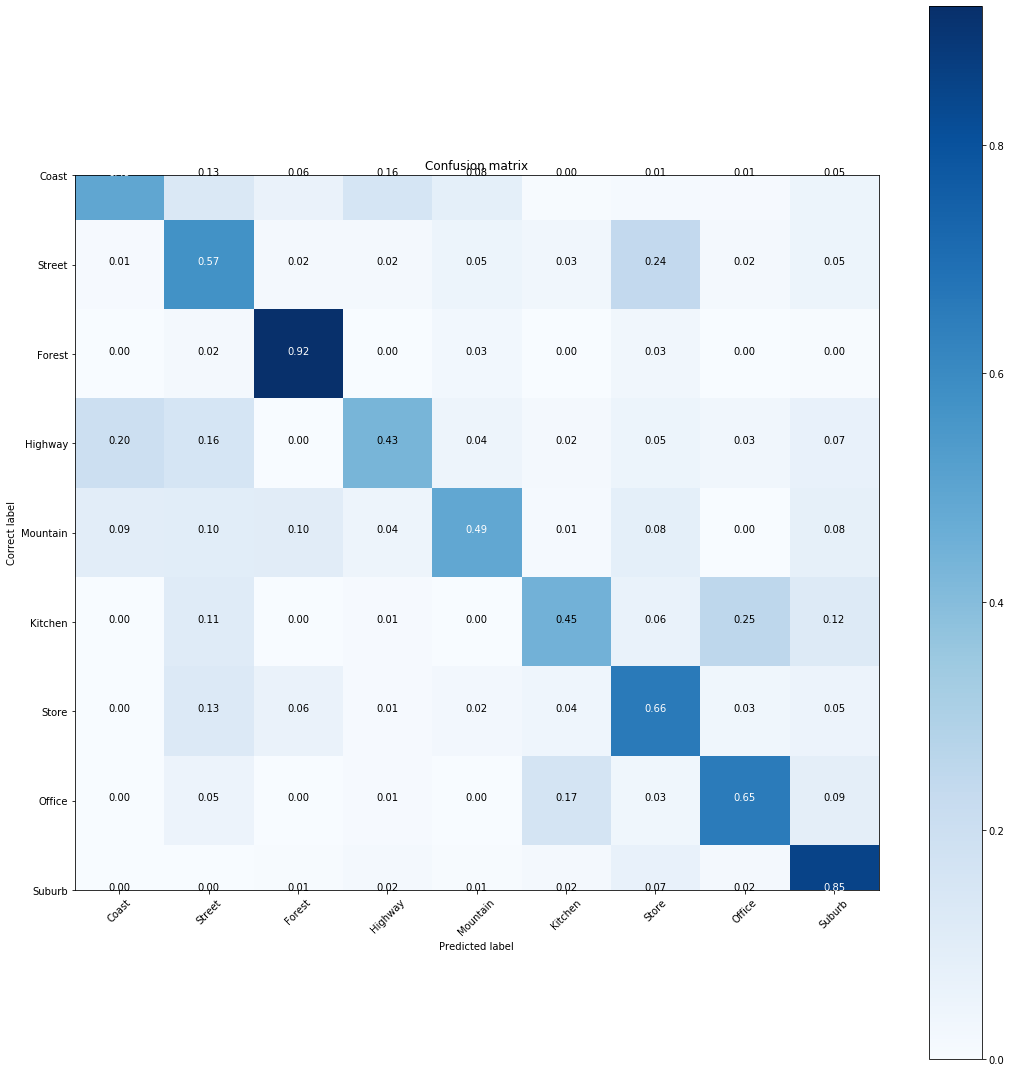

In [163]:
print(cm)
c = [x for x in os.listdir(sift_path)]
plot_confusion_matrix(cm, c)
plt.show()

pred: Coast	correct: Coast
CORRECT
Coast


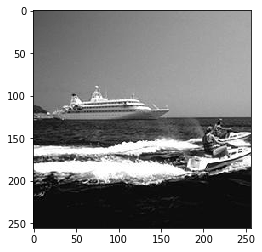

pred: Coast	correct: Coast
CORRECT
Coast


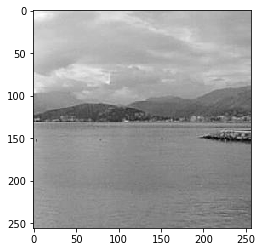

pred: Street	correct: Street
CORRECT
Street


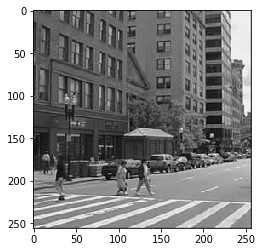

pred: Street	correct: Street
CORRECT
Street


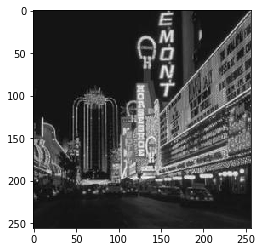

pred: Forest	correct: Forest
CORRECT
Forest


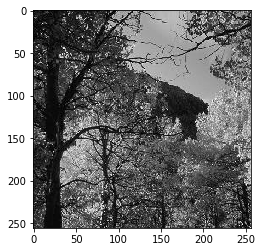

pred: Coast	correct: Highway
Highway


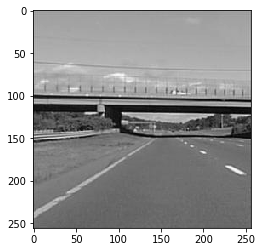

pred: Suburb	correct: Mountain
Mountain


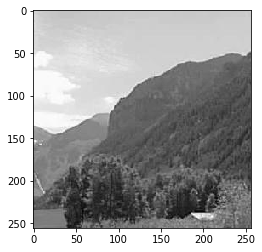

pred: Forest	correct: Mountain
Mountain


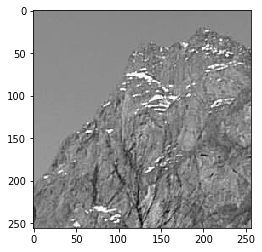

pred: Kitchen	correct: Kitchen
CORRECT
Kitchen


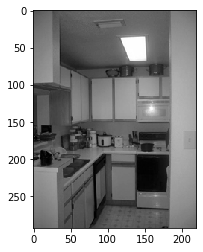

pred: Suburb	correct: Store
Store


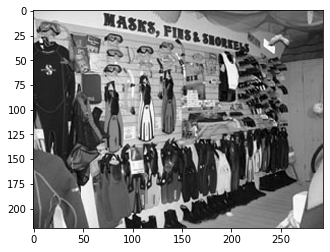

pred: Office	correct: Office
CORRECT
Office


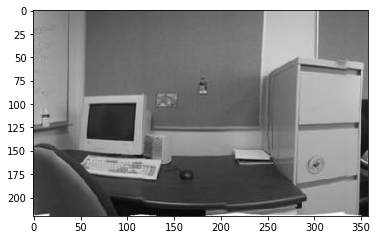

pred: Suburb	correct: Suburb
CORRECT
Suburb


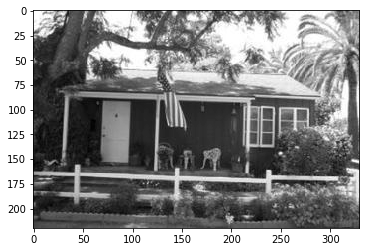

In [159]:
for i in range(0, 1695, 150):
    print(f"pred: {c[int(predicted_lables[i][0])]}\tcorrect: {c[correct_lables[i]]}")
    if int(predicted_lables[i][0]) == correct_lables[i]:
        print("CORRECT")
    plt.imshow(plt.imread(get_test_image(i)), cmap='gray')
    plt.show()